## Index for crop_prod.ipynb code

Description: Investigate correlations between crop types and value per hectare

### 1. Preparation of the data
   - Load the data
   - Create pivot tables to join pc and tc together

### 2. Correlation and Regression Analysis
   - Correlation Matrix of crop type with value per hectare
   - Regression plots for each individual crop type

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Preparation of the data

In [2]:
permcrop4_df = pd.read_csv('../CSVs/Permanent_Crop_NUTS4_2019.csv', sep=",")
tempcrop4_df = pd.read_csv('../CSVs/Temporary_Crop_NUTS4_2019.csv', sep=",")
education4_df = pd.read_csv('../CSVs/Education_NUTS4_2019.csv', sep=",")
labour4_df = pd.read_csv('../CSVs/Labour_NUTS4_2019.csv', sep=",")
prod4_df = pd.read_csv('../CSVs/Production_NUTS4_2019.csv', sep=",")

In [3]:
pc_totals = permcrop4_df[permcrop4_df['pcn.crop_name'] == 'Total'].copy()
pc_no_totals = permcrop4_df[permcrop4_df['pcn.crop_name'] != 'Total'].copy()

tc_totals = tempcrop4_df[tempcrop4_df['tcn.crop_name'] == 'Total'].copy()
tc_no_totals = tempcrop4_df[tempcrop4_df['tcn.crop_name'] != 'Total'].copy()

In [4]:
pc_totals.head()

,NutsID,region_name,NUTS_level,pc.year,pc.area,pc.hold,pcn.crop_name
0,1111601,Arcos de Valdevez,4,2019,613,1271,Total
8,1111602,Caminha,4,2019,73,228,Total
16,1111603,Melgaço,4,2019,719,746,Total
24,1111604,Monção,4,2019,1725,1568,Total
32,1111605,Paredes de Coura,4,2019,76,289,Total


In [5]:
tc_totals.head()

,NutsID,region_name,NUTS_level,tc.year,tc.area,tc.hold,tcn.crop_name
0,1111601,Arcos de Valdevez,4,2019,962,1142,Total
11,1111602,Caminha,4,2019,300,291,Total
22,1111603,Melgaço,4,2019,96,347,Total
33,1111604,Monção,4,2019,638,905,Total
44,1111605,Paredes de Coura,4,2019,1265,588,Total


In [6]:
# calculate sum pc and tc area
pctc_totals = pc_totals.merge(tc_totals, on=['NutsID'], how='inner')
pctc_totals['total_crop_area'] = pctc_totals['tc.area'] + pctc_totals['pc.area']
pctc_only_totals = pctc_totals[['NutsID', 'total_crop_area']]
pctc_only_totals.head()

,NutsID,total_crop_area
0,1111601,1575
1,1111602,373
2,1111603,815
3,1111604,2363
4,1111605,1341


In [7]:
# funcations to apply percentage calculation
def pc_crop_percentage(row):
    id = row['NutsID']
    value = row['pc.area']
    total = pctc_only_totals[pctc_only_totals['NutsID'] == id]['total_crop_area'].values[0]
    if total == 0:
        return None
    return round((value / total) * 100, 2)

def tc_crop_percentage(row):
    id = row['NutsID']
    value = row['tc.area']
    total = pctc_only_totals[pctc_only_totals['NutsID'] == id]['total_crop_area'].values[0]
    if total == 0:
        return None
    return round((value / total) * 100, 2)

In [8]:
pc_no_totals.loc[:, 'pc_area_perc'] = pc_no_totals.apply(pc_crop_percentage, axis=1)
tc_no_totals.loc[:, 'tc_area_perc'] = tc_no_totals.apply(tc_crop_percentage, axis=1)

In [9]:
pc_no_totals.head()

,NutsID,region_name,NUTS_level,pc.year,pc.area,pc.hold,pcn.crop_name,pc_area_perc
1,1111601,Arcos de Valdevez,4,2019,27,67,Fresh fruit plantations (excluding citrus plan...,1.71
2,1111601,Arcos de Valdevez,4,2019,5,55,Citrus plantations,0.32
3,1111601,Arcos de Valdevez,4,2019,3,12,Fruit plantations (subtropical climate zones),0.19
4,1111601,Arcos de Valdevez,4,2019,90,129,Nuts plantations,5.71
5,1111601,Arcos de Valdevez,4,2019,11,73,Olive plantations,0.70


In [10]:
tc_no_totals.head()

,NutsID,region_name,NUTS_level,tc.year,tc.area,tc.hold,tcn.crop_name,tc_area_perc
1,1111601,Arcos de Valdevez,4,2019,301,865,Cereals,19.11
2,1111601,Arcos de Valdevez,4,2019,12,114,Dried pulses,0.76
3,1111601,Arcos de Valdevez,4,2019,194,227,Temporary grasses and grazings,12.32
4,1111601,Arcos de Valdevez,4,2019,422,553,Fodder plants,26.79
5,1111601,Arcos de Valdevez,4,2019,22,323,Potatoes,1.40


In [11]:
# pivot pc and tc
pc_pivot = pd.pivot_table(
    data=pc_no_totals,
    index='NutsID',
    columns=['pcn.crop_name'],
    values='pc_area_perc'
)

tc_pivot = pd.pivot_table(
    data=tc_no_totals,
    index='NutsID',
    columns=['tcn.crop_name'],
    values='tc_area_perc'
)

In [12]:
pc_pivot.head()

pcn.crop_name,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards
NutsID,,,,,,,
1111601,0.32,1.71,0.19,5.71,0.70,0.13,30.16
1111602,0.54,1.61,0.00,7.24,1.88,0.00,8.31
1111603,0.12,0.86,0.00,0.74,0.00,0.00,86.50
1111604,0.21,1.44,0.08,0.21,0.04,0.00,71.01
1111605,0.07,1.04,0.15,0.75,0.00,2.61,1.12


In [13]:
tc_pivot.head()

tcn.crop_name,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Sugarbeets,Temporary grasses and grazings
NutsID,,,,,,,,,,
1111601,19.11,0.76,0.06,26.79,0.51,0.13,0.0,1.40,0.0,12.32
1111602,31.64,1.07,4.56,29.49,0.80,0.00,0.8,2.95,0.0,9.12
1111603,5.28,0.12,0.00,3.56,0.12,0.00,0.0,1.35,0.0,1.35
1111604,8.34,0.21,0.08,12.44,0.38,0.00,0.0,0.63,0.0,4.91
1111605,10.89,0.30,0.00,47.28,0.07,0.00,0.0,1.49,0.0,34.30


In [14]:
# join pc and tc
total_crops = pc_pivot.join(tc_pivot, on='NutsID', how='inner')

In [15]:
total_crops.head()

,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Sugarbeets,Temporary grasses and grazings
NutsID,,,,,,,,,,,,,,,,,
1111601,0.32,1.71,0.19,5.71,0.70,0.13,30.16,19.11,0.76,0.06,26.79,0.51,0.13,0.0,1.40,0.0,12.32
1111602,0.54,1.61,0.00,7.24,1.88,0.00,8.31,31.64,1.07,4.56,29.49,0.80,0.00,0.8,2.95,0.0,9.12
1111603,0.12,0.86,0.00,0.74,0.00,0.00,86.50,5.28,0.12,0.00,3.56,0.12,0.00,0.0,1.35,0.0,1.35
1111604,0.21,1.44,0.08,0.21,0.04,0.00,71.01,8.34,0.21,0.08,12.44,0.38,0.00,0.0,0.63,0.0,4.91
1111605,0.07,1.04,0.15,0.75,0.00,2.61,1.12,10.89,0.30,0.00,47.28,0.07,0.00,0.0,1.49,0.0,34.30


In [16]:
# drop sugarbeets, is not present anywhere
total_crops.drop('Sugarbeets', axis=1, inplace=True)

## 2. Correlation and Regression Analysis

In [17]:
# setting index for comparing with crops
prod_values = prod4_df.set_index('NutsID')

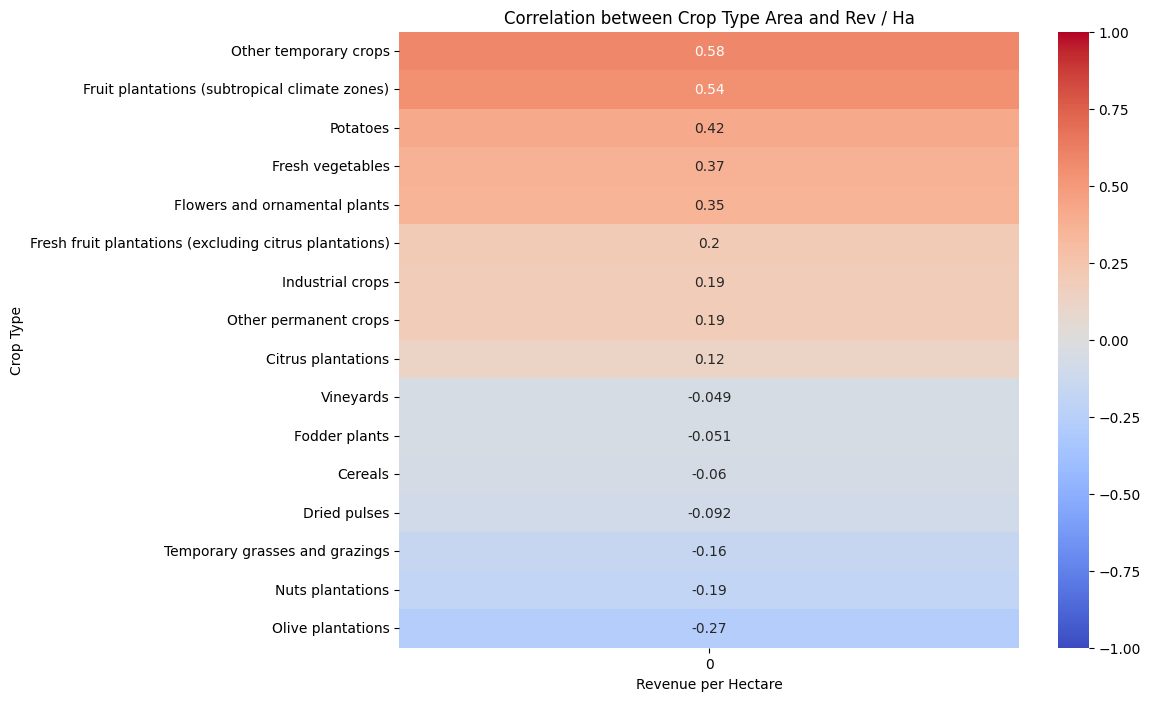

In [18]:
# correlation between crop and rev per ha
corr_matrix = (total_crops.apply(lambda x: x.corr(prod_values['p.area_ha']))).sort_values(ascending=False)

# create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Crop Type Area and Rev / Ha")
plt.xlabel("Revenue per Hectare")
plt.ylabel("Crop Type")
plt.show()

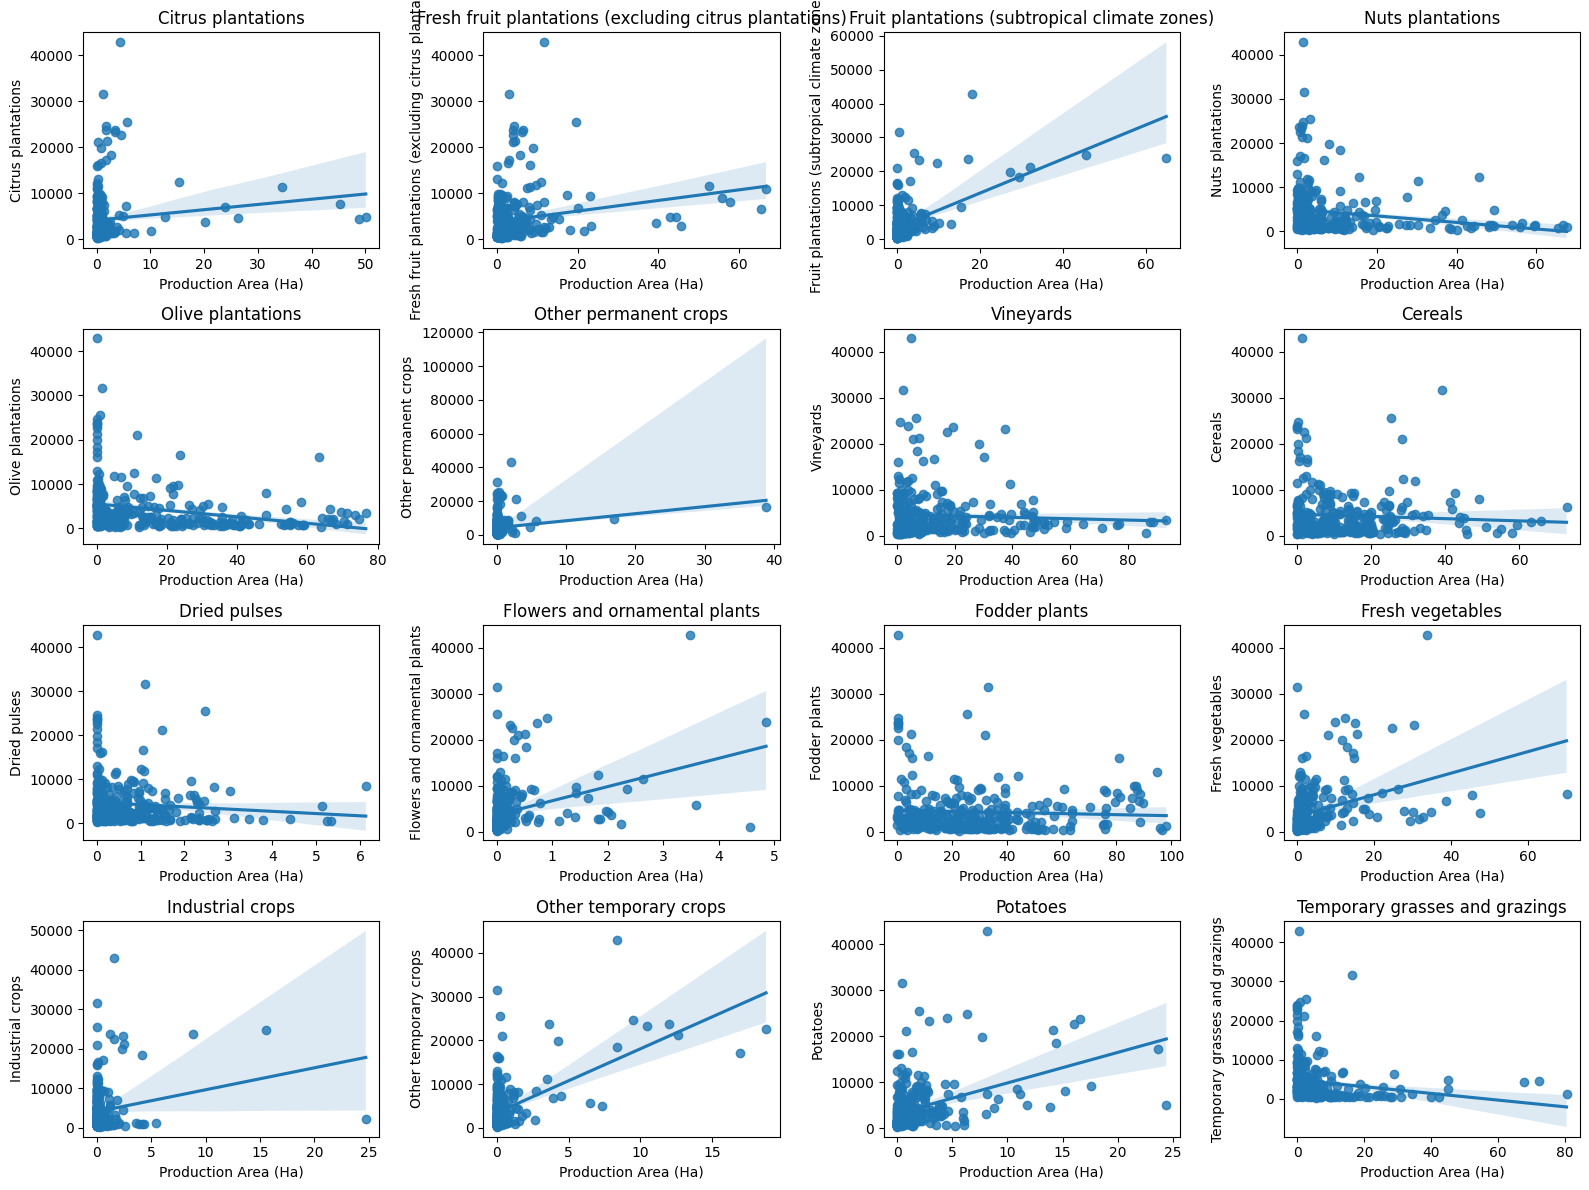

In [19]:
# Create a figure with subplots for each crop
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))

# Iterate over each crop column and create a scatter plot with regression line
for i, (ax, crop_col) in enumerate(zip(axs.flatten(), total_crops.columns)):
    sns.regplot(x=total_crops[crop_col], y=prod_values['p.area_ha'], ax=ax)
    ax.set_title(f"{crop_col}")
    ax.set_xlabel("Production Area (Ha)")
    ax.set_ylabel(crop_col)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()